### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

**Student 1**: Henrique Parede de Souza

**RA 1**: 260497

**Student 2**: Mateus de Lima Almeida

**RA 2**: 242827

---

### **Assignment 2: MC886A**
#### **Model Selection and Regularization**
##### Notebook: mc886_1s2025-assignment_2.ipynb

Hello students! Our first task was about Linear Regression on teh Life Expectancy dataset. Now, in this task 2, we will cover Model Selection and Regularization. Let's review what we covered during lectures.

For this task, we'll use a Bank Marketing dataset [1] from UCI's repository. This dataset contains information about marketing campaigns conducted by a bank, with the goal of predicting whether a client will subscribe to a term deposit (our target variable 'y').

The dataset includes various client attributes such as age, job type, marital status, and education level, along with information about previous contacts and campaign outcomes. This rich set of features will allow us to explore different modeling approaches and regularization techniques.

Throughout this assignment, you'll:
1. Perform data exploration and preprocessing
2. Implement various models with different regularization techniques
3. Compare model performance using appropriate metrics
4. Practice model selection based on validation results

Remember that proper handling of categorical features and addressing class imbalance (if present) will be crucial for building effective models. We'll also focus on preventing overfitting through regularization methods we've discussed in our lectures.

#### **Objective:**

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task using PyTorch.

##### **Dataset: Bank Marketing**

The dataset contains data from a bank's marketing campaigns. Each record represents a client's interaction with a campaign, aimed at predicting whether the client will subscribe to a term deposit.

You can check the information about the dataset here: [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)

Our classification objective is to determine whether a client will subscribe to a term deposit, indicated by the "y" column (target), where "yes" = 1 and "no" = 0.

Features and their descriptions:

- **age**: Age of the client (numeric).
- **job**: Type of job (categorical: e.g., "admin.", "blue-collar", "student").
- **marital**: Marital status (categorical: "married", "single", "divorced").
- **education**: Education level (categorical: "primary", "secondary", "tertiary", "unknown").
- **default**: Has credit in default? (categorical: "yes", "no").
- **balance**: Average yearly balance in euros (numeric).
- **housing**: Has a housing loan? (categorical: "yes", "no").
- **loan**: Has a personal loan? (categorical: "yes", "no").
- **contact**: Contact communication type (categorical: "cellular", "telephone", "unknown").
- **day**: Last contact day of the month (numeric).
- **month**: Last contact month of the year (categorical: e.g., "jan", "feb").
- **duration**: Last contact duration in seconds (numeric).
- **campaign**: Number of contacts performed during this campaign for this client (numeric).
- **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; -1 means not previously contacted).
- **previous**: Number of contacts performed before this campaign for this client (numeric).
- **poutcome**: Outcome of the previous marketing campaign (categorical: "success", "failure", "other", "unknown").
- **y**: Target value, indicating whether the client subscribed to a term deposit (categorical: "yes" or "no").

**How to load the dataset**

We'll download the dataset directly from the UCI Machine Learning Repository within the notebook. Run the following cell to fetch and load the data.

*If you want to run the notebook locally, just download the dataset and change the path accondingly to the location of the folder in your local environment. You can revisit the notebook 00 from our first hands-on, and set the environment that better suits you.*

In [1]:
!pip3 install torchmetrics

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import plotly.express as px
from torchmetrics import F1Score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download and load dataset (you can change this part, and save the file directly to your Drive or locally)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip -o bank.zip

--2025-05-19 01:18:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank.zip.2’

bank.zip.2              [ <=>                ] 565.47K  3.46MB/s    in 0.2s    

2025-05-19 01:18:24 (3.46 MB/s) - ‘bank.zip.2’ saved [579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [4]:
# Remember you must mount the drive here, to read the CSV file. Recap the Task 1 (assignement 1) or the notebook from the hands-on 1
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('bank-full.csv', sep=';')

### **Data Analysis and Preprocessing** $(1.0 \space point)$

In this section, explore the dataset to understand its structure and relationships. Avoid using test data during training.

P.S.: You can yse the same approach as in the task 1 (assignment 1).

#### **Exploration**

You can plot graphs with features that you think are important to visualize the relation with the target. You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with `OneHotEncoding`, and remember to scale continuous features to be in a similar scale between each other.

In [6]:
# Display first few rows
print(df.head())
print("##################")
print(df.info())
print("##################")
print(df['y'].value_counts())  # Check class distribution

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (to

In [7]:
for label in df:
  if label != "y" and df.dtypes[label] != "object":
    fig = px.box(df, x='y', y=label, title=f'{label} by subscription Outcome')
    fig.show()

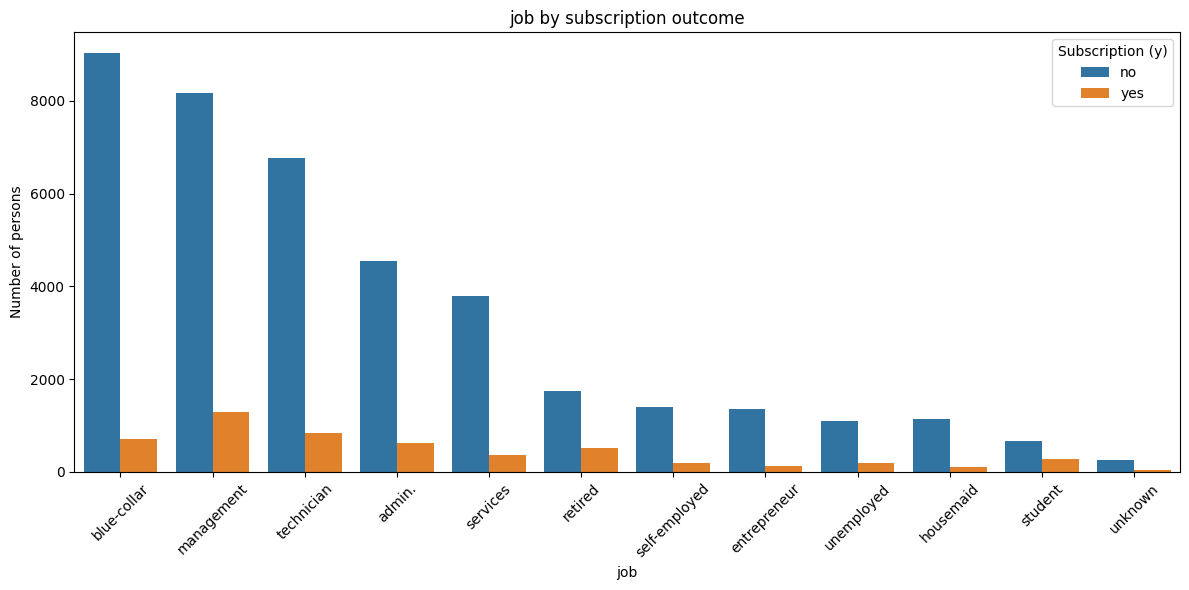

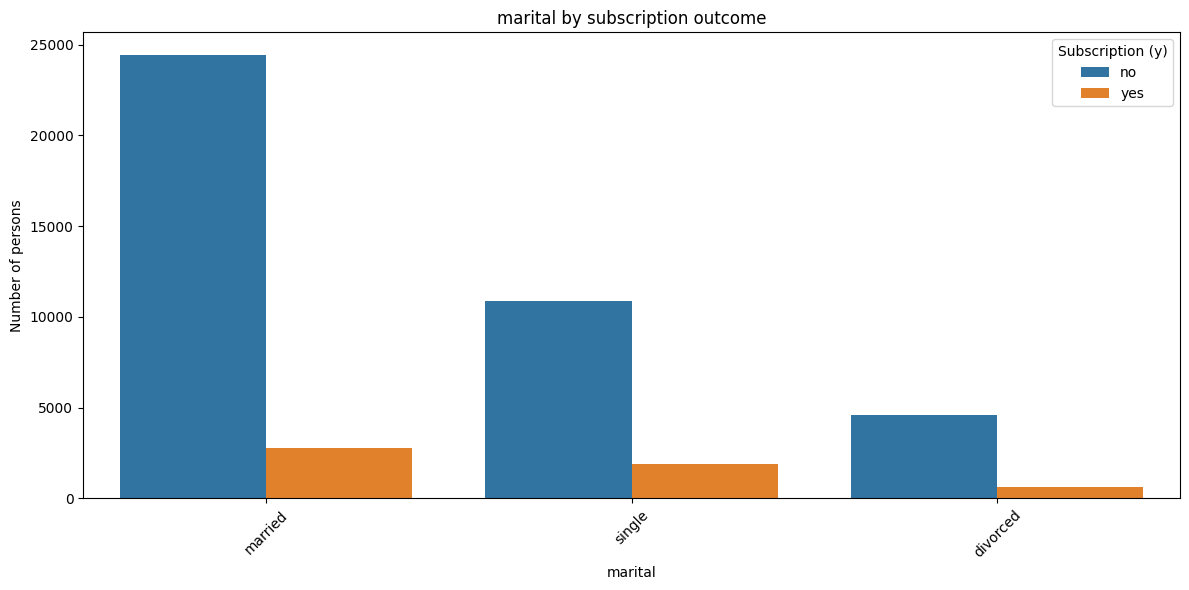

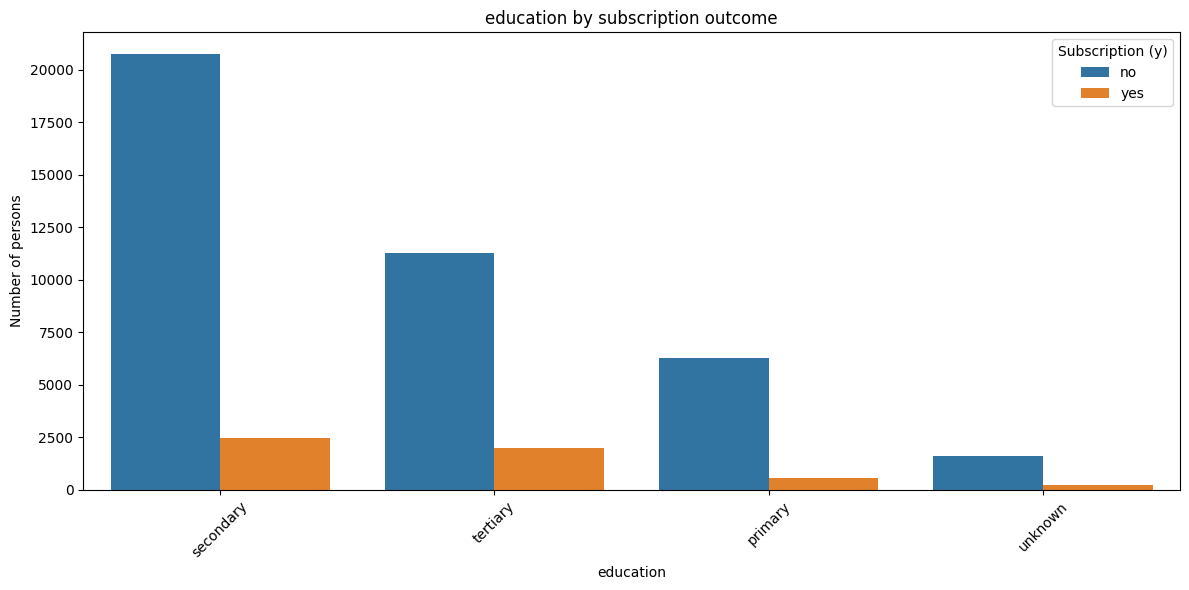

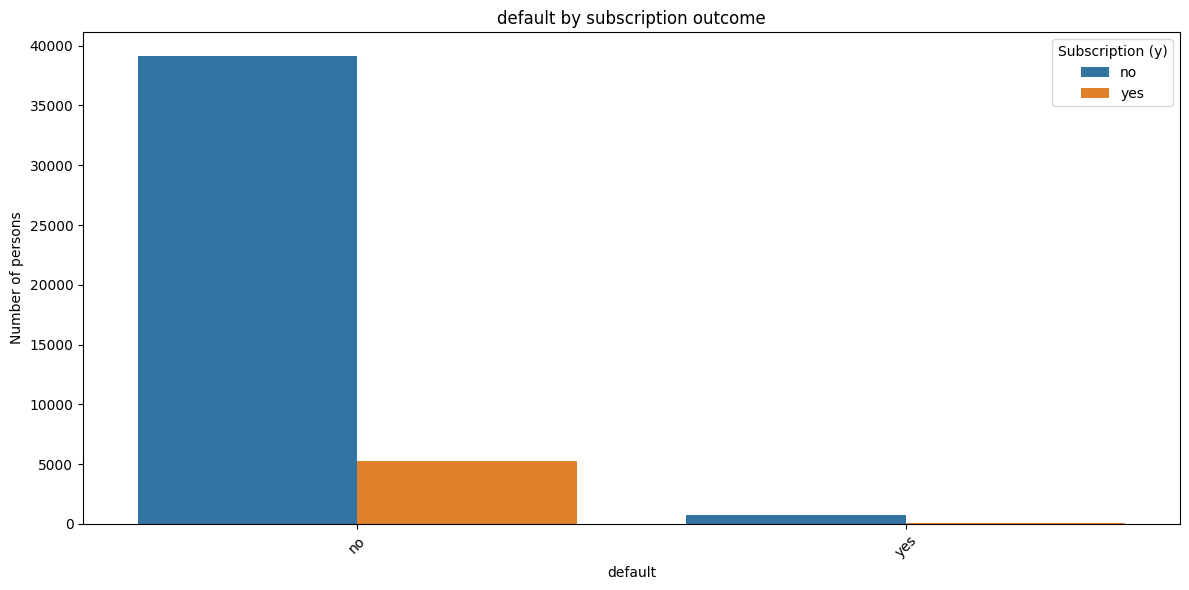

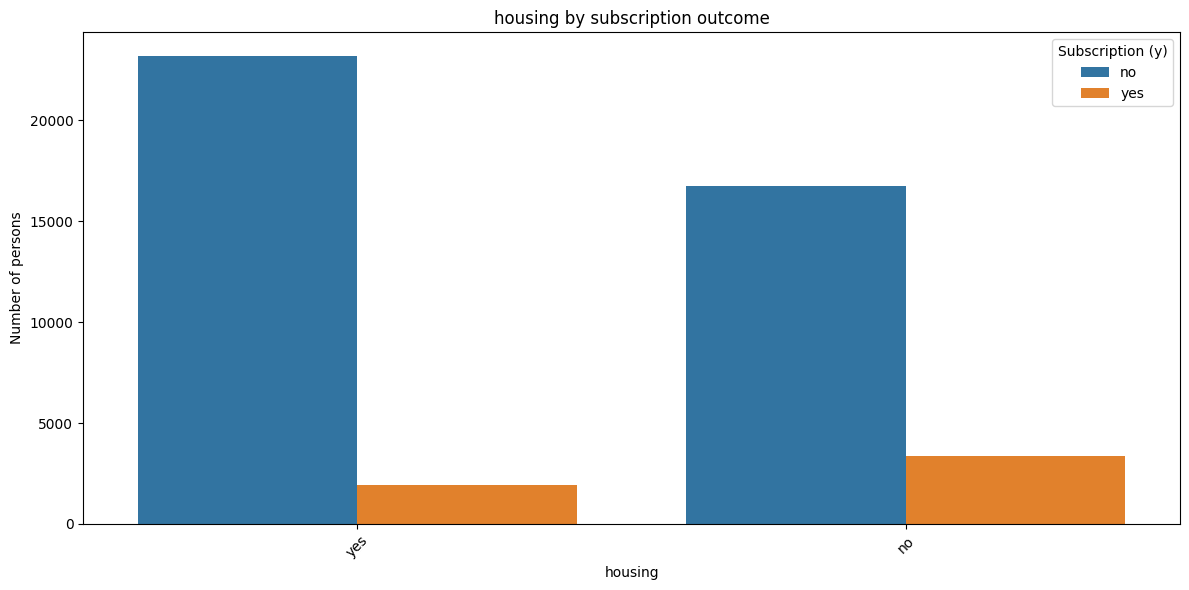

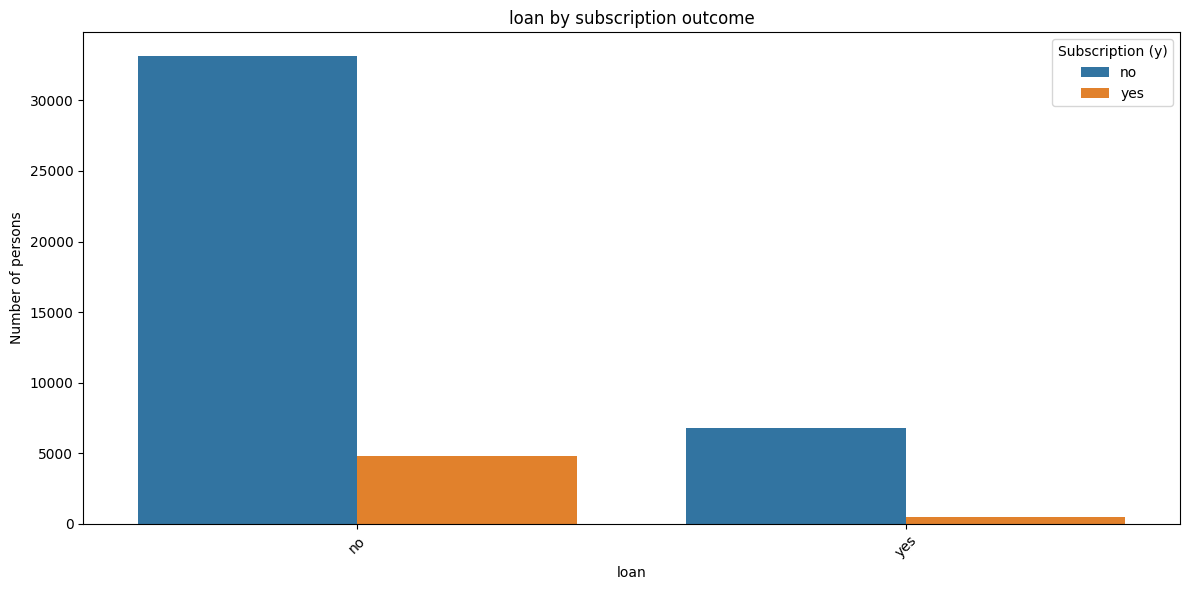

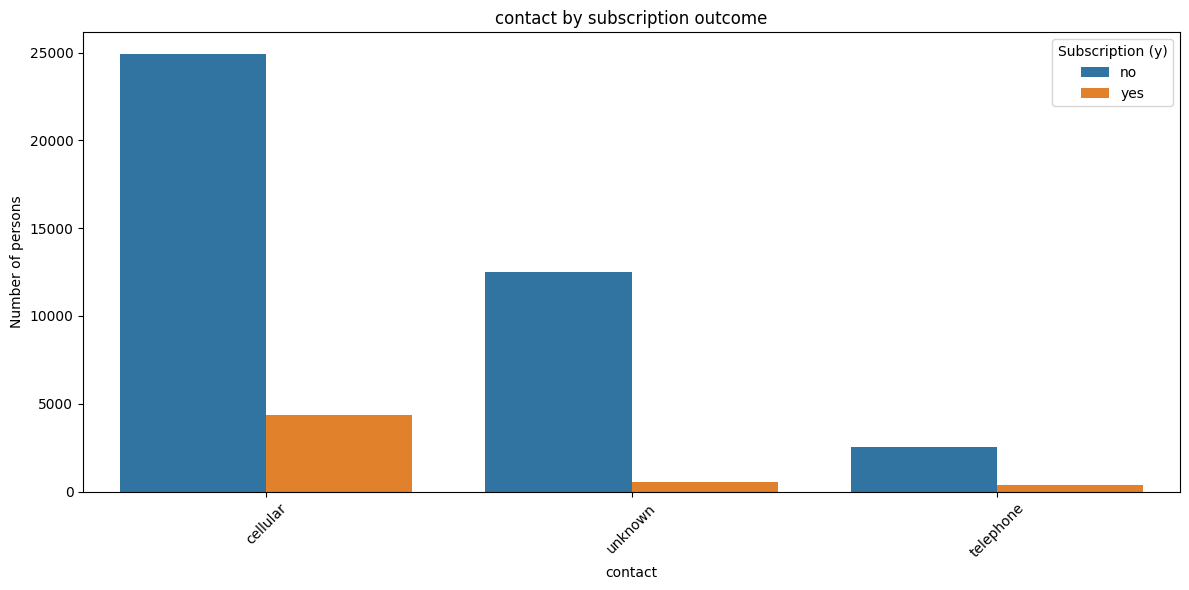

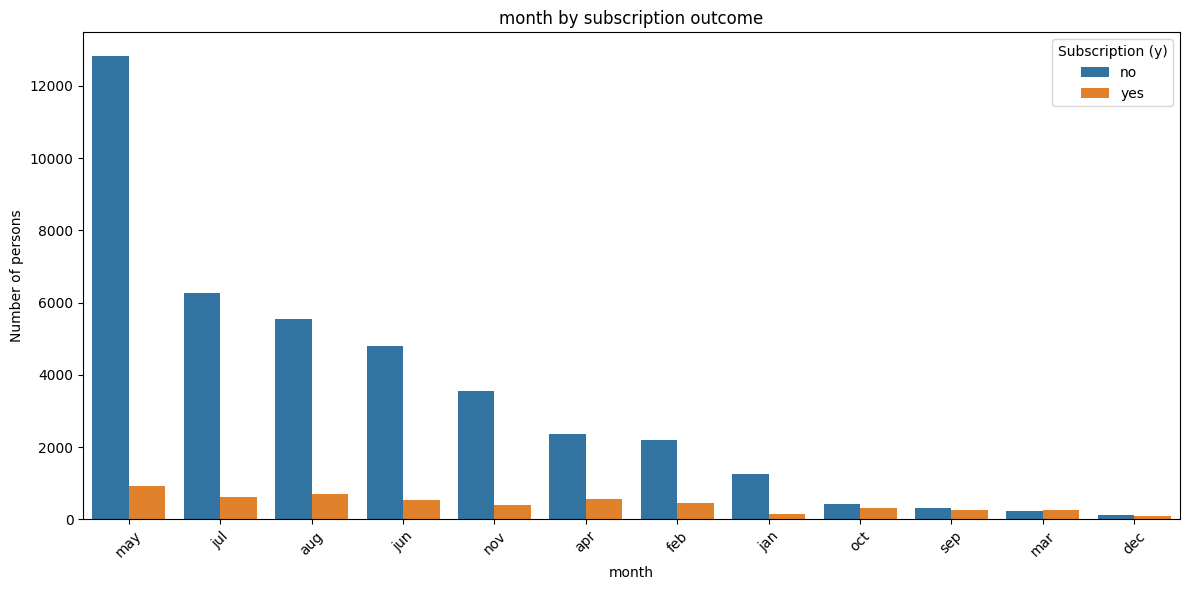

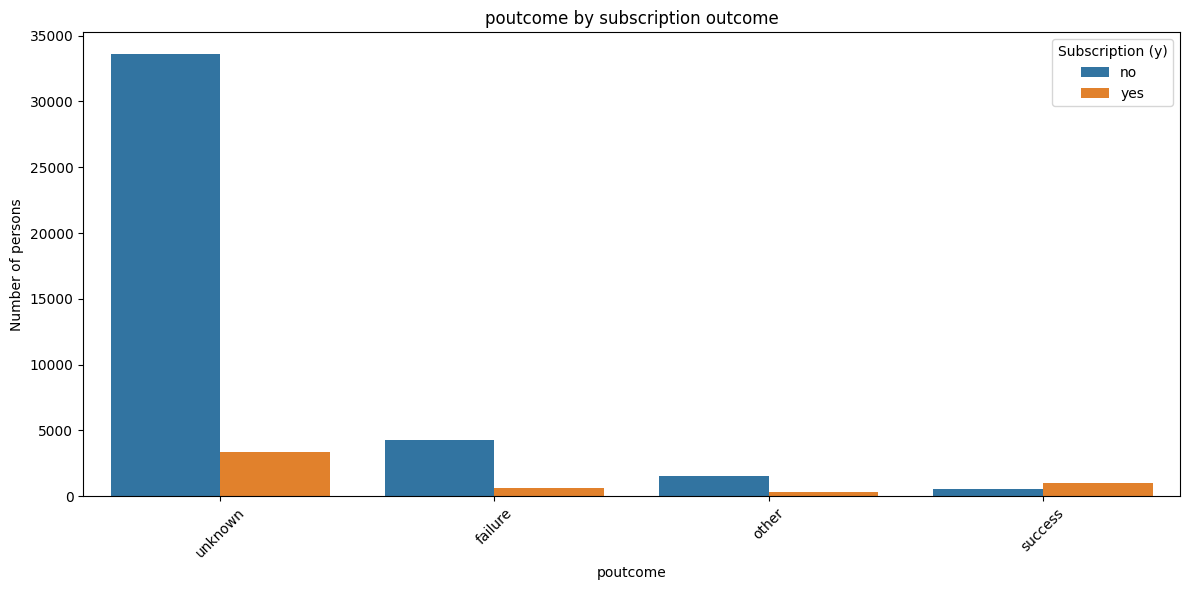

In [8]:
for label in df:
  if label != "y" and df.dtypes[label] == "object":
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=label, hue='y', order=df[label].value_counts().index)
    plt.title(f'{label} by subscription outcome')
    plt.xlabel(label)
    plt.ylabel('Number of persons')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription (y)')
    plt.tight_layout()
    plt.show()

In [9]:
df["job"] = df["job"].map({"unknown": 11,"student": 10,"housemaid": 9,"unemployed": 8, "entrepreneur": 7,"self-employed": 6,"retired": 5,"services": 4,"admin.": 3,"technician": 2,"management": 1, "blue-collar": 0})
df["marital"] = df["marital"].map({"married": 2, "single": 1, "divorced": 0})
df["education"] = df["education"].map({"tertiary": 3, "secondary": 2, "primary": 1, "unknown": 0})
df["default"] = df["default"].map({"yes": 1, "no": 0})
df["housing"] = df["housing"].map({"yes": 1, "no": 0})
df["loan"] = df["loan"].map({"yes": 1, "no": 0})
df["contact"] = df["contact"].map({"cellular": 2, "telephone": 1, "unknown": 0})
df["month"] = df["month"].map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
})

df["poutcome"] = df["poutcome"].map({"success": 3, "failure": 2, "other": 1, "unknown": 0})
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Handle missing values (fill with median for simplicity)
df = df.fillna(df.median())

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,2,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,7,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,0,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,11,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [10]:
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False)

,y
y,1.000000
duration,0.394521
poutcome,0.221128
contact,0.148395
pdays,0.103621
previous,0.093236
job,0.059027
balance,0.052838
education,0.051341
age,0.025155


array([[<Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='duration', ylabel='y'>,
        <Axes: xlabel='poutcome', ylabel='y'>,
        <Axes: xlabel='month', ylabel='y'>],
       [<Axes: xlabel='y', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='poutcome', ylabel='duration'>,
        <Axes: xlabel='month', ylabel='duration'>],
       [<Axes: xlabel='y', ylabel='poutcome'>,
        <Axes: xlabel='duration', ylabel='poutcome'>,
        <Axes: xlabel='poutcome', ylabel='poutcome'>,
        <Axes: xlabel='month', ylabel='poutcome'>],
       [<Axes: xlabel='y', ylabel='month'>,
        <Axes: xlabel='duration', ylabel='month'>,
        <Axes: xlabel='poutcome', ylabel='month'>,
        <Axes: xlabel='month', ylabel='month'>]], dtype=object)

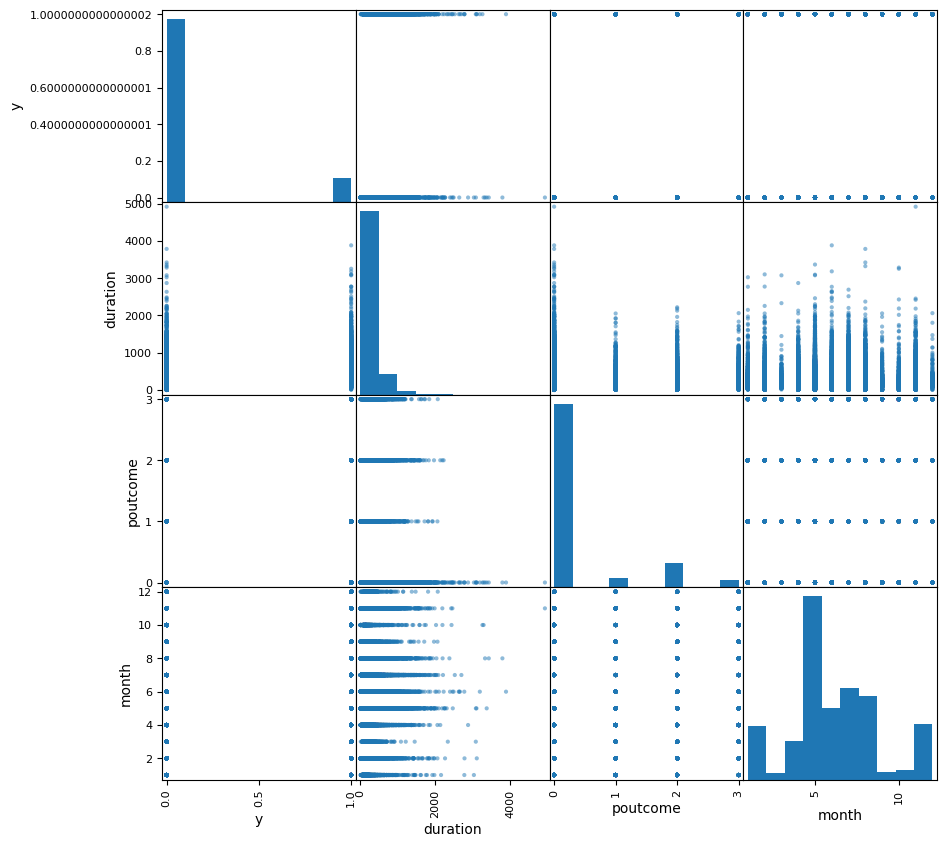

In [11]:
from pandas.plotting import scatter_matrix
df_subset = df[["y", "duration", "poutcome", "month"]]


scatter_matrix(df_subset, diagonal='hist', figsize=(10, 10))

Com base na matriz de correlação e na *scatter matrix*, escolhemos dropar as variáveis 'month' e 'default'.

Analisando a influência futura das variáveis, decidimos dropar 'duration', 'poutcome' e 'previous'.

In [12]:
# Drop 'duration' to prevent data leakage
"""
    You may want to change this part. This is just an example.
    You should judge what column makes sense to drop to avoid data leakage.
    You can recall from the Task 1 (assignment 1), where we had to deal with data leakage.
"""
df = df.drop('duration', axis=1)
df = df.drop('poutcome', axis=1)
df = df.drop('previous', axis=1)


df = df.drop('month', axis=1)
df = df.drop('default', axis=1)

#### **Preprocessing**

In [13]:
# Separate features and target
X = df.drop('y', axis=1).to_numpy()
y = df['y'].to_numpy()

O one-hot encoding foi feito na seção anterior

In [14]:
# One-hot encode categorical features
print("O one-hot encoding foi feito na seção anterior")

O one-hot encoding foi feito na seção anterior


In [15]:
# Manual train-test split
"""
    This is just an example. You can change this implementation.
    You can recall what you have learned from the Task 1.
"""
np.random.seed(42)

indices = np.arange(len(X))
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]

test_size = 0.3
split_idx = int(len(X) * (1 - test_size))

X_train, X_test = X_shuffled[:split_idx], X_shuffled[split_idx:]
y_train, y_test = y_shuffled[:split_idx], y_shuffled[split_idx:]

In [16]:
# Scale numerical features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### **Metric Selection** $(0.5 \space point)$

Since the dataset is imbalanced (more "no" than "yes" subscriptions), accuracy is not a good performance indicator. What metric should be used here, making it suitable for imbalanced classification tasks like this one, where could correctly identify the minority class ("yes") is important?

Discuss the choice of the metric here:

No caso do dataset desbalanceado, podemos utilizar indicadores como:

*   Recall: penaliza o modelo quando erra uma resposta que era positiva.
*   Precision: penaliza o modelo para predições incorretas.
*   R1-score: medida composta do recall e do precision.



Como o R1-score é uma métrica composta entre as duas primeiras abordagens, ela contém aspectos positivos de ambas, sendo, portanto, mais utilizada no contexto atual, onde queremos penalizar misses para classe minoritária.

\

$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

\


### **Model Selection** $(4.5 \space points)$

This section focuses on selecting the best model and hyperparameters using PyTorch. You must implement a logistic regression model with L1 (Lasso) and L2 (Ridge) regularization, manually, and perform a grid search with K-fold cross-validation. You can use the Scikit-learn library, in this part, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model.


##### **Utility Functions**

In [17]:
from sklearn.metrics import f1_score

def manual_F1_score(y_true, y_pred):

    TP = FP = FN = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 0 and yp == 1:
            FP += 1
        elif yt == 1 and yp == 0:
            FN += 1

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return f1

In [37]:
from torchmetrics import F1Score

sigmoid = nn.Sigmoid()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

class LogisticRegressionL1L2:
    def __init__(self, lr=0.01, epochs=1000, lambdaLasso=0.1, lambdaRidge=0.1):
        self.lr = lr
        self.epochs = epochs
        self.lambdaLasso = lambdaLasso
        self.lambdaRidge = lambdaRidge

    def fit(self, X, y):

        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32).to(device)
        if not isinstance(y, torch.Tensor):
            y = torch.tensor(y, dtype=torch.float32).to(device)

        m, n = X.shape
        X = torch.cat([torch.ones(m, 1).to(device), X], dim=1)
        self.theta = torch.zeros(n + 1, device=device, requires_grad=False)

        for epoch in range(self.epochs):
            z = torch.matmul(X, self.theta)
            h = sigmoid(z)
            gradient = torch.matmul(X.t(), (h - y)) / m

            lasso_penalty = self.lambdaLasso * torch.sign(self.theta)
            lasso_penalty[0] = 0

            ridge_penalty = self.lambdaRidge * 2 * self.theta
            ridge_penalty[0] = 0

            total_gradient = gradient + lasso_penalty + ridge_penalty
            self.theta -= self.lr * total_gradient

    def predict(self, X, threshold=0.2):
        # Converter dados para tensor se necessário
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32).to(device)

        m = X.shape[0]
        X = torch.cat([torch.ones(m, 1).to(device), X], dim=1)
        probabilities = sigmoid(torch.matmul(X, self.theta))
        return (probabilities >= threshold).cpu().numpy()


regressor = LogisticRegressionL1L2(lr=0.01, epochs=1000, lambdaLasso=0.01, lambdaRidge=0.01)
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test, 0.222)
y_pred_train = regressor.predict(X_train, 0.222)

f1_train = manual_F1_score(y_train, y_pred_train)
f1_test = manual_F1_score(y_test, y_pred_test)

print(f"Manual Implementation")
print(f"F1-score no treino: {f1_train}")
print(f"F1-score no teste:  {f1_test}")

f1 = F1Score(task="binary").to(device)
f1_train = f1(torch.tensor(y_pred_train, device=device),
              torch.tensor(y_train, device=device))
f1_test = f1(torch.tensor(y_pred_test, device=device),
             torch.tensor(y_test, device=device))

print()
print("Torchmetrics Function")
print(f"F1-score no treino: {f1_train.cpu().numpy()}")
print(f"F1-score no teste:  {f1_test.cpu().numpy()}")

Usando dispositivo: cpu
Manual Implementation
F1-score no treino: 0.3241252302025783
F1-score no teste:  0.3088987384930106

Torchmetrics Function
F1-score no treino: 0.3241252303123474
F1-score no teste:  0.3088987469673157


*You must implement F1 Score from scratch (manual) and from Torchmetrics and compare the results (manual implementation and Torchmetrics implementation)*

##### **Grid Search with K-fold CV**

In [48]:
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

param_grid = {
    'lambdaLasso': [0.001, 0.01, 0.1],
    'lambdaRidge': [0.001, 0.01, 0.1],
    'lr': [0.001, 0.01],
    'epochs': [500, 1000]
}

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_score = -1
best_params = None

for lr in param_grid['lr']:
    for epochs in param_grid['epochs']:
        for lambdaLasso in param_grid['lambdaLasso']:
            for lambdaRidge in param_grid['lambdaRidge']:
                fold_scores = []

                for train_idx, val_idx in kf.split(X_train):
                    X_train_kf, X_val_kf = X_train[train_idx], X_train[val_idx]
                    y_train_kf, y_val_kf = y_train[train_idx], y_train[val_idx]

                    model = LogisticRegressionL1L2(lr=lr, epochs=epochs,
                                                 lambdaLasso=lambdaLasso,
                                                 lambdaRidge=lambdaRidge)
                    model.fit(X_train, y_train)

                    y_pred = model.predict(X_val_kf)
                    score = f1_score(y_val_kf, y_pred)
                    fold_scores.append(score)

                mean_score = np.mean(fold_scores)

                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {
                        'lr': lr,
                        'epochs': epochs,
                        'lambdaLasso': lambdaLasso,
                        'lambdaRidge': lambdaRidge
                    }
                    print(f"New best F1-score: {best_score:.4f}")
                    print(f"Parameters: {best_params}")

print()
print("Best hyperparameters found:")
print(best_params)
print(f"Best F1-score: {best_score:.4f}")

New best F1-score: 0.6599
Parameters: {'lr': 0.001, 'epochs': 500, 'lambdaLasso': 0.001, 'lambdaRidge': 0.001}

Best hyperparameters found:
{'lr': 0.001, 'epochs': 500, 'lambdaLasso': 0.001, 'lambdaRidge': 0.001}
Best F1-score: 0.6599


In [55]:
test_size = 0.3
split_idx = int(len(X) * (1 - test_size))

X_train, X_test = X_shuffled[:split_idx], X_shuffled[split_idx:]
y_train, y_test = y_shuffled[:split_idx], y_shuffled[split_idx:]

# Scale numerical features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = LogisticRegressionL1L2(lr=0.001, epochs=500, lambdaLasso=0, lambdaRidge=0)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = manual_F1_score(y_train, y_pred_train)
f1_test = manual_F1_score(y_test, y_pred_test)

print("Sem regularização")
print(f"F1-score no treino: {f1_train}")
print(f"F1-score no teste:  {f1_test}")

Sem regularização
F1-score no treino: 0.25
F1-score no teste:  0.2088128772635815


##### **Discussion of Key Points**
- **What was the best model hyperparameters, according to cross-validation?**
  - Run the code to find out. The best combination of regularization type, strength, and polynomial degree will be printed.
- **Did models with regularization outperform the one without it?**
  - Compare the F1-score when lambda_reg=0 (no regularization) vs. other values. Regularization might improve performance by preventing overfitting, especially with polynomial features.

*   De acordo com o resultado do KFold e com o grid utilizado, notamos que os melhores hiperparâmetros foram: 'lr': 0.001, 'epochs': 500, 'lambdaLasso': 0.001, 'lambdaRidge': 0.001, obtendo um F1-score de 0.66
*   Para $lambdaLasso \ = \ lambdaRigel \ = \ 0$, percebemos uma queda significativa do F1-score, indicando que a falta de regularização levou à queda de desempenho.

### **Threshold Testing** $(1.0 \space point)$

Test different thresholds to optimize the F1-score for the best model.

In [63]:
import numpy as np

thresholds = np.linspace(0.05, 0.95, 19)
f1_scores = []

for t in thresholds:
    y_pred = model.predict(X_test, threshold=t)
    score = manual_F1_score(y_test, y_pred)
    f1_scores.append(score)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Melhor threshold encontrado: {best_threshold:.3f}")
print(f"F1-score correspondente: {best_f1:.4f}")

Melhor threshold encontrado: 0.450
F1-score correspondente: 0.2504


### **Visualizing/Interpreting Weights** $(1.5 \space points)$

In [58]:
# Generate feature names for plotting
featurenames = [f'feature{i}' for i in range(X_train.shape[1])]
print(featurenames)

['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10']


In [59]:
# Train final model
model = LogisticRegressionL1L2(lr=0.001, epochs=500, lambdaLasso=0.001, lambdaRidge=0.001)
model.fit(X_train, y_train)

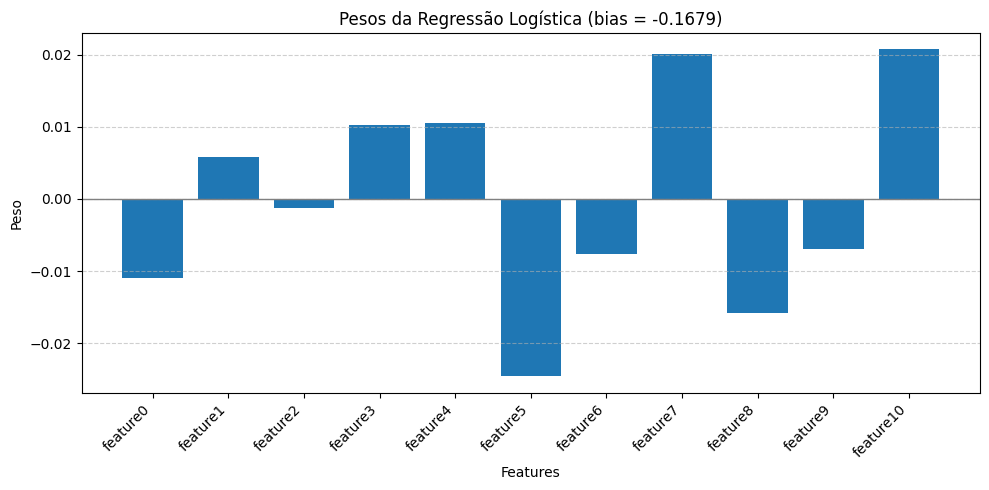

In [60]:
# Weight plotting function
import matplotlib.pyplot as plt
import numpy as np

def plot_weights_from_model(model, feature_names=None, title='Pesos da Regressão Logística'):
    weights = model.theta.detach().cpu().numpy()
    bias = weights[0]
    feature_weights = weights[1:]

    n_features = len(feature_weights)

    if feature_names is None:
        feature_names = [f'x{i}' for i in range(n_features)]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(range(n_features), feature_weights, tick_label=feature_names)
    plt.axhline(0, color='gray', linewidth=1)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Peso')
    plt.title(f'{title} (bias = {bias:.4f})')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


plot_weights_from_model(model, featurenames)

##### **Discussion of Key Points**
- **What conclusions can you draw from the weight graphs?**
  - Look at the magnitude of weights. L1 regularization (Lasso) may set some weights to zero, indicating feature sparsity, while L2 (Ridge) shrinks weights but keeps all features. Compare this to lambda_reg=0 if tested.

Observando o gráfico de pesos, observamos que a Feature 2 tem pouca relevância para o resultado do modelo.

### **Testing** $(1.5 \space point)$

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test, threshold=0.450)

final_f1 = manual_F1_score(y_test, y_pred_test)
print(f"F1-score final no teste (threshold=0.222): {final_f1:.4f}")



F1-score final no teste (threshold=0.222): 0.2504


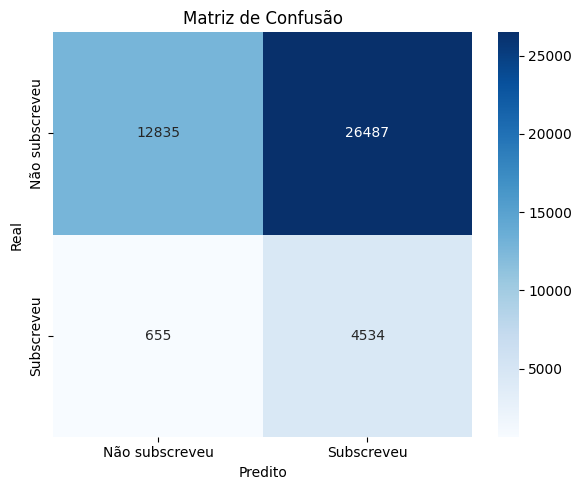

In [65]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plota a matriz de confusão para os rótulos verdadeiros e predições.
    """
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Não subscreveu', 'Subscreveu']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_test)

---

#### **Deadline**

Thursday, May 18, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May (3) 6 11:59 pm : grade * 0.75
- May (4) 7, 11:59 pm : grade * 0.5
- May (5) 8, 11:59 pm : grade * 0.25

---

#### **Submission**

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.

---

#### **REFERENCE**

Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.